#                                           RAINFALL PREDICTION

In [1]:
#Importing Libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                         
%matplotlib inline

import seaborn as sns
from plotly.subplots import make_subplots
from sklearn import metrics

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


# DataAnalysing

In [3]:
df.shape
#Shape of the dataset

(8425, 23)

In [4]:
df.columns
#Columns of the dataset...

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.info()
#Types of the dataset...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
df.nunique()
#Unique valus in each columns..

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

<AxesSubplot:>

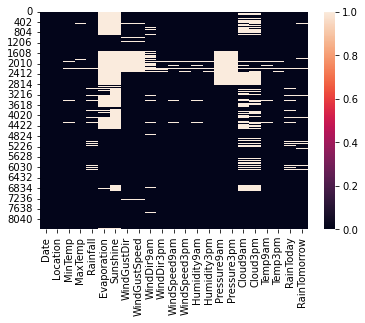

In [8]:
sns.heatmap(df.isnull())
#Checking null values in the dataset using heatmap..

In [9]:
for i in df.columns:
    print(df[i].value_counts())
    print('*****')

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
*****
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
*****
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
*****
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
*****
0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0 

# DataCleaning

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      2008-12-01
1      2008-12-02
2      2008-12-03
3      2008-12-04
4      2008-12-05
          ...    
8420   2017-06-21
8421   2017-06-22
8422   2017-06-23
8423   2017-06-24
8424   2017-06-25
Name: Date, Length: 8425, dtype: datetime64[ns]

In [11]:
#Extracting Day,Mnth,and Year from Date of Journey column..
df['Day'] = pd.to_datetime(df.Date,format="%d/%m/%Y").dt.day
df['Month'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.month
df['Year'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.year

In [12]:
df.drop(columns=['Date'],axis=1,inplace=True)
#Dropping column Date in dataset...

In [13]:
df.sample(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
1918,Newcastle,7.0,16.8,5.4,NaN,NaN,NaN,NaN,NaN,SE,...,NaN,6.0,7.0,9.4,16.0,Yes,No,14,7,2014
911,CoffsHarbour,18.2,28.2,0.0,6.8,9.0,NNE,50.0,NNW,NE,...,1012.8,1.0,1.0,24.0,25.9,No,Yes,14,3,2009
6481,Brisbane,19.4,26.3,34.2,3.6,0.0,SE,26.0,E,SE,...,1013.6,7.0,7.0,22.2,22.7,Yes,Yes,17,1,2012
4928,Melbourne,8.9,23.4,0.0,3.2,11.9,SW,35.0,N,SSW,...,1014.5,1.0,2.0,15.5,21.4,No,No,17,11,2010
6024,Melbourne,13.7,22.3,0.0,6.4,1.0,NaN,NaN,N,NNE,...,997.6,7.0,7.0,22.3,17.2,No,Yes,28,9,2011
1934,Newcastle,10.4,22.5,0.0,NaN,NaN,NaN,NaN,N,NW,...,NaN,0.0,0.0,16.0,22.2,No,No,30,7,2014
3086,Williamtown,6.9,18.9,0.2,NaN,NaN,NW,26.0,NW,SE,...,1021.4,NaN,5.0,11.5,17.7,No,No,10,7,2016
160,Albury,5.4,19.5,0.0,NaN,NaN,SE,17.0,NaN,SE,...,1022.3,NaN,NaN,11.7,19.1,No,No,10,5,2009
2367,Penrith,4.2,19.6,0.2,NaN,NaN,W,22.0,SSE,N,...,NaN,NaN,NaN,8.3,18.8,No,No,16,6,2014
3959,Williamtown,5.5,22.2,0.0,NaN,NaN,WNW,52.0,WNW,W,...,1015.7,NaN,8.0,12.8,19.4,No,No,31,7,2016


In [14]:
df.isnull().sum()
#Null values in each columns..

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Day                 0
Month               0
Year                0
dtype: int64

In [15]:
#Filling null values in MinTemp with it's mean
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

#Filling null values in MaxTemp with it's mean
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

#Fillinf null values in Rainfall with it's mode, as most of the rows have 0 rainfall.
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mode()[0])

#Filling null values in Evaporation with it's mean
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())

#Filling null values in Sunshine with it's mean
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())

#Filling null values in WindGustDir with it's mode
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

#Filling null values in WindGustSpeed with it's mean
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

#Filling null values in WindDir9am with it's mode
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

#Filling null values in WindDir3pm with it's mode
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

#Filling null values in WindSpeed9am with it's mean
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

#Filling null values in WindSpeed3pm with it's mean
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())

#Filling null values in Humidity9am with it's mean
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())

#Filling null values in Humidity3pm with it's mean
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

#Filling null values in Pressure9am with it's mean
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())

#Filling null values in Pressure3pm with it's mean
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

#Filling null values in Cloud9am with it's mean
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())

#Filling null values in Cloud3pm with it's mean
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

#Filling null values in Temp9am with it's mean
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in RainToday with it's mode
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

#Filling null values in RainTomorrow with it's mode
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [16]:
df.isnull().sum()
#Removed the null values present in the dataset..

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [17]:
df.describe()
#Checking the mean quantiles and std_dev in dataset..

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.725982,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,15.741958,6.442136,2012.102433
std,5.379488,6.114516,10.319872,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,8.787354,3.437994,2.473137
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,8.000000,3.000000,2010.000000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,16.000000,6.000000,2011.000000
75%,17.300000,28.000000,0.800000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


In [18]:
df.columns.to_series().groupby(df.dtypes).groups
#Grouping the types of dataset seperately..

{int64: ['Day', 'Month', 'Year'], float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], object: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

# EDA and Visualisation

# Univariate

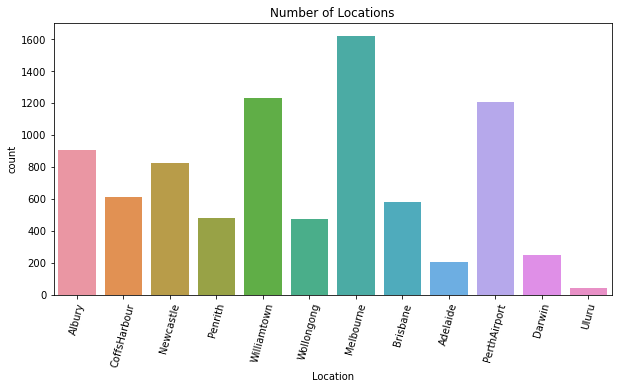

In [19]:
# The various Locations present in the dataset...
plt.figure(figsize=(10,5))
sns.countplot(df["Location"])
plt.title("Number of Locations")
plt.xticks(rotation=75)
plt.show()

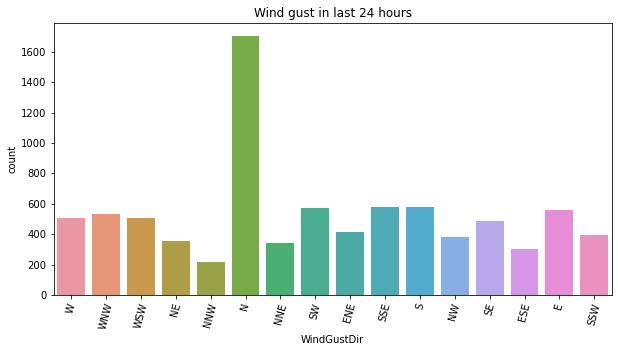

In [20]:
# The direction of the strongest wind gust in the 24 hours...
plt.figure(figsize=(10,5))
sns.countplot(df["WindGustDir"])
plt.title("Wind gust in last 24 hours")
plt.xticks(rotation=75)
plt.show()

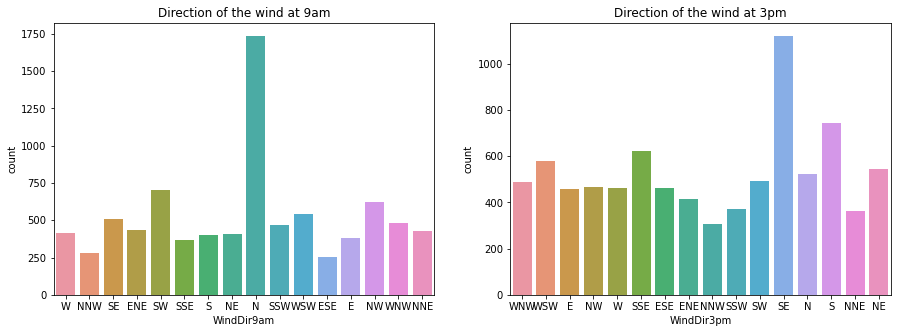

In [21]:
#Wind at 9 am and 3pm.
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Direction of the wind at 9am')
sns.countplot(df['WindDir9am'])
plt.subplot(1,2,2)
plt.title('Direction of the wind at 3pm')
sns.countplot(df['WindDir3pm'])
plt.show()

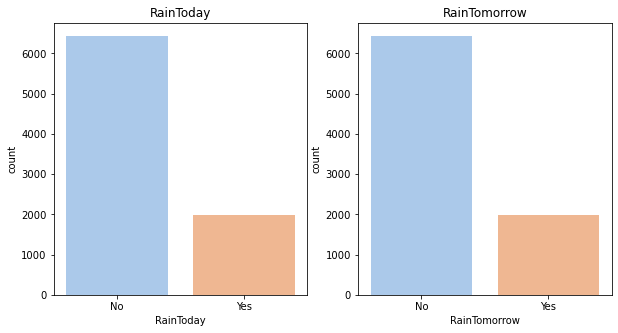

In [22]:
#Visualization of Rainfall today and tomorrow:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('RainToday')
sns.countplot(df['RainToday'],palette='pastel')
plt.subplot(1,2,2)
plt.title('RainTomorrow')
sns.countplot(df['RainTomorrow'], palette='pastel')
plt.show()

In [23]:
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


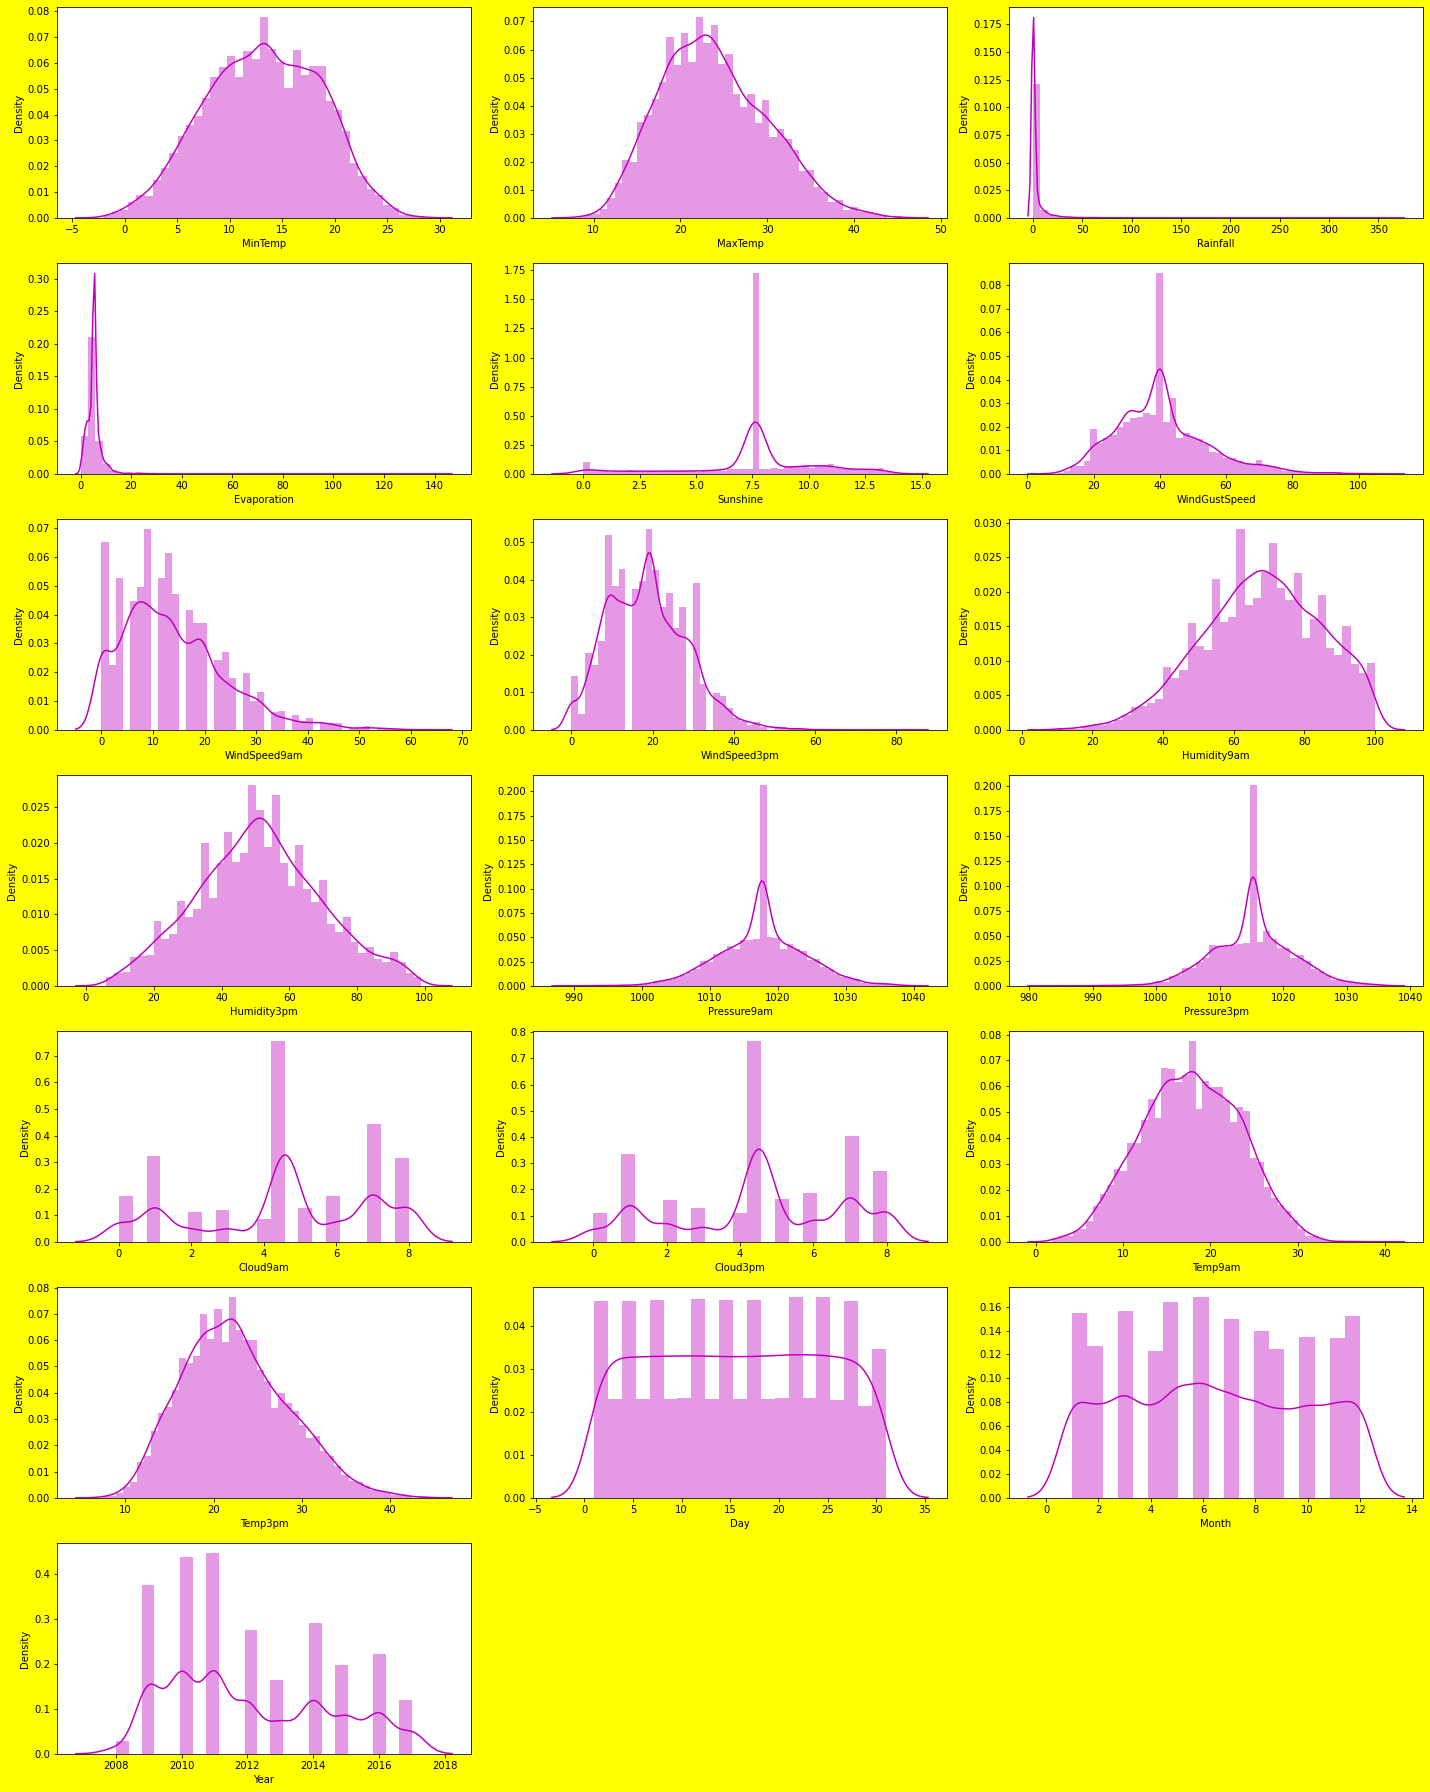

In [24]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

# Bivariate

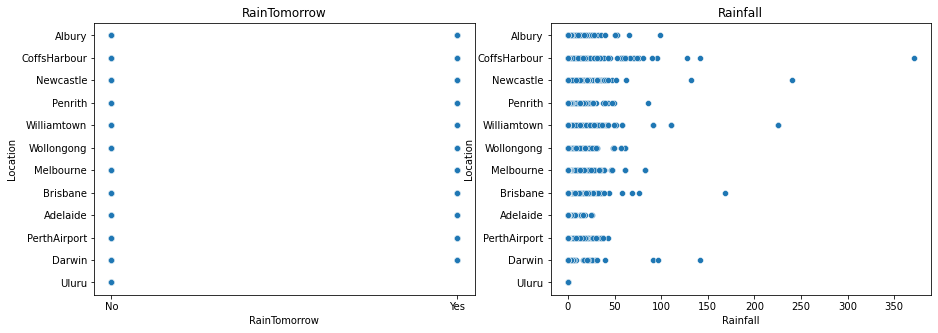

In [25]:
#checking the corelation between location with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='Location',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='Location',data=df)
plt.show()

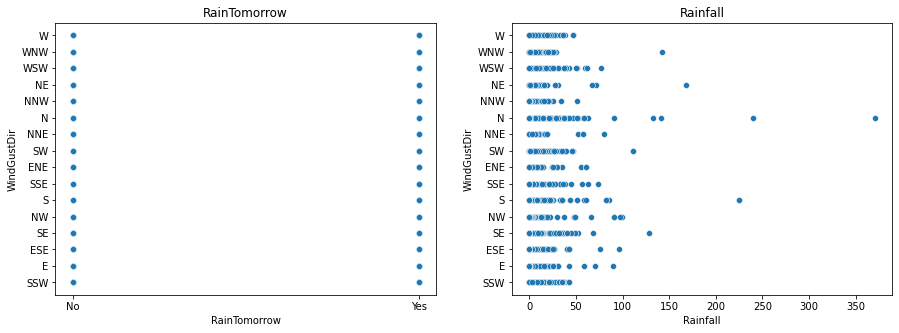

In [26]:
#checking the corelation between WindGustDir with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='WindGustDir',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='WindGustDir',data=df)
plt.show()

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

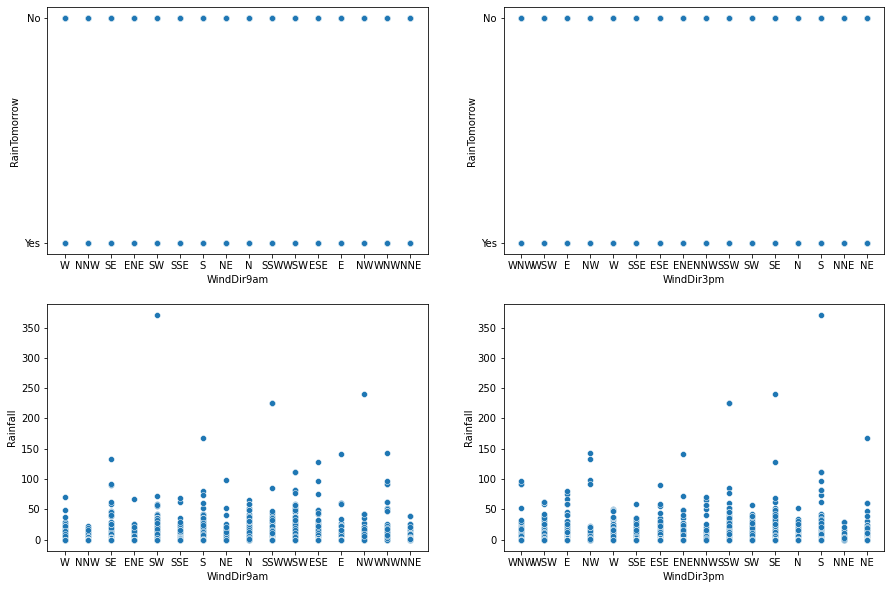

In [27]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindDir9am and RainTomorrow
sns.scatterplot(x='WindDir9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and RainTomorrow
sns.scatterplot(x='WindDir3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between WindDir9am and Rainfall
sns.scatterplot(x='WindDir9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and Rainfall
sns.scatterplot(x='WindDir3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

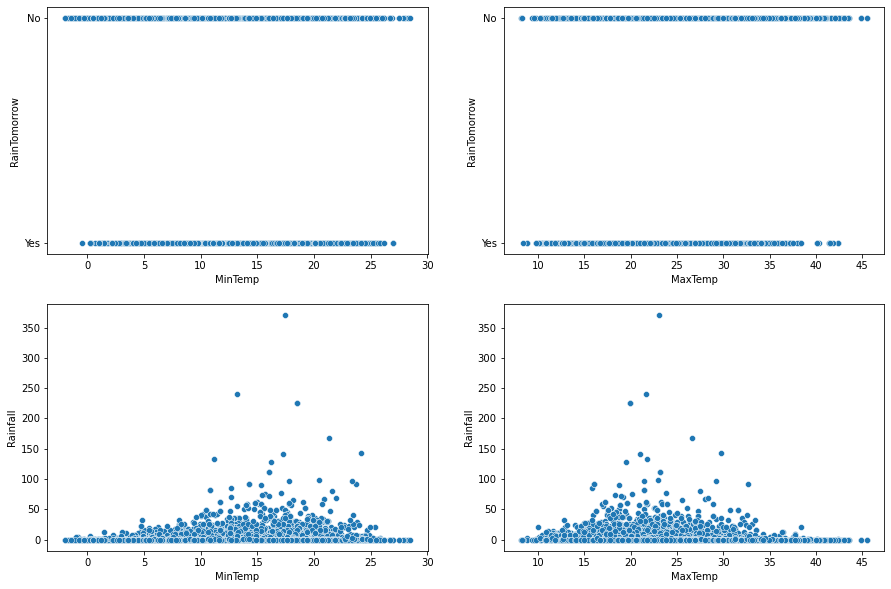

In [28]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between minimum temperature and RainTomorrow
sns.scatterplot(x='MinTemp',y='RainTomorrow',ax=axes[0,0],palette="green",data=df)

#checking the relation between max temperature and RainTomorrow
sns.scatterplot(x='MaxTemp',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between minimum temperature and Rainfall
sns.scatterplot(x='MinTemp',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between max temperature and Rainfall
sns.scatterplot(x='MaxTemp',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

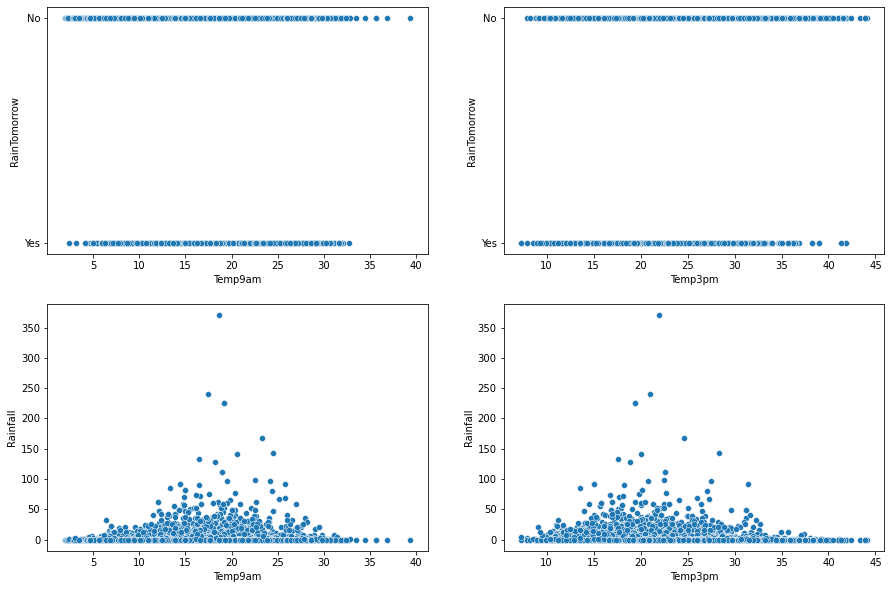

In [29]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Temp9am and RainTomorrow
sns.scatterplot(x='Temp9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Temp3pm and RainTomorrow
sns.scatterplot(x='Temp3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Temp9am and Rainfall
sns.scatterplot(x='Temp9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Temp3pm and Rainfall
sns.scatterplot(x='Temp3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

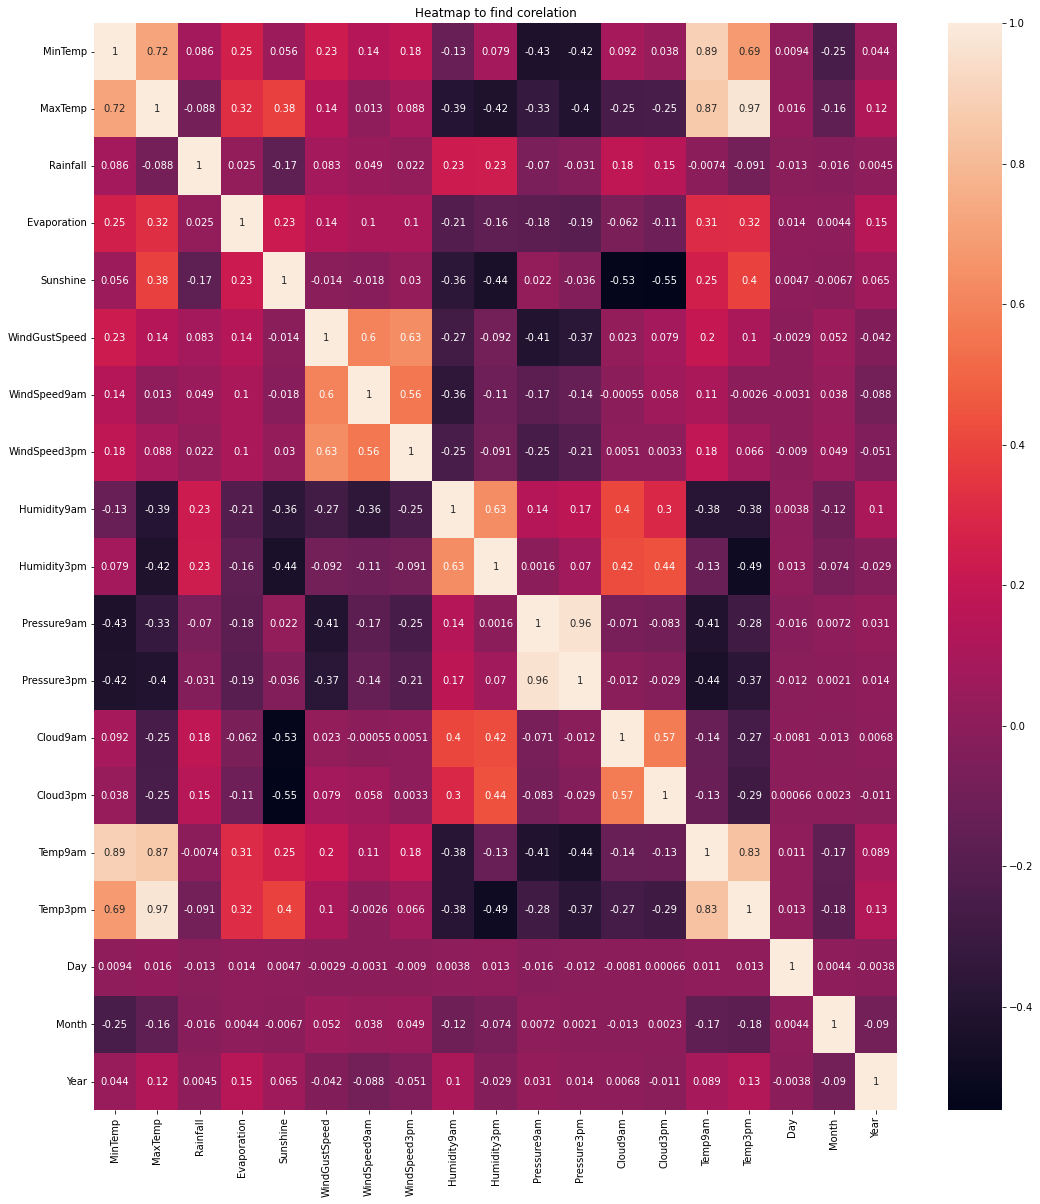

In [30]:
corr=df.corr()
plt.figure(figsize=(18,20))
sns.heatmap(corr,annot=True,annot_kws={'size':10})
plt.title("Heatmap to find corelation")
plt.show

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

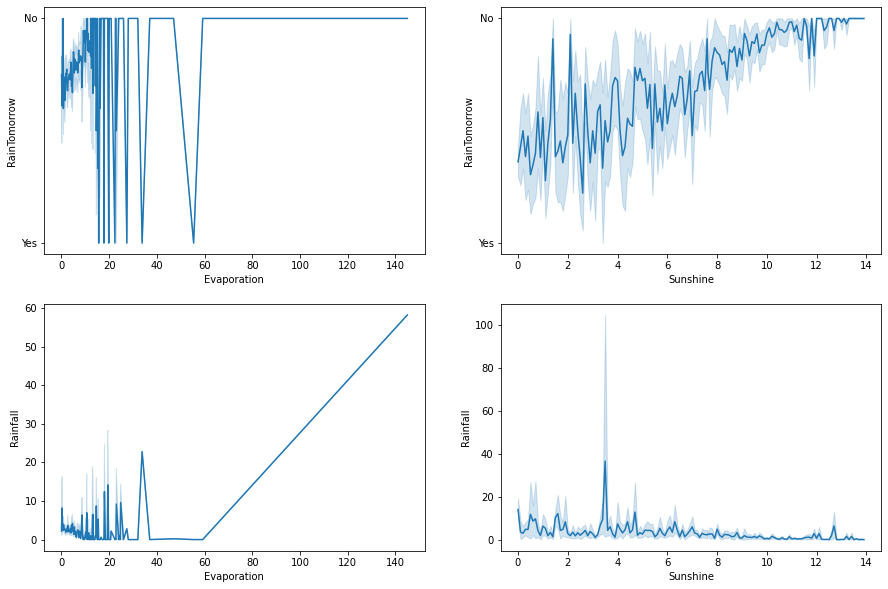

In [31]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Evaporation and RainTomorrow
sns.lineplot(x='Evaporation',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Sunshine and RainTomorrow
sns.lineplot(x='Sunshine',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Evaporation and Rainfall
sns.lineplot(x='Evaporation',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Sunshine and Rainfall
sns.lineplot(x='Sunshine',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

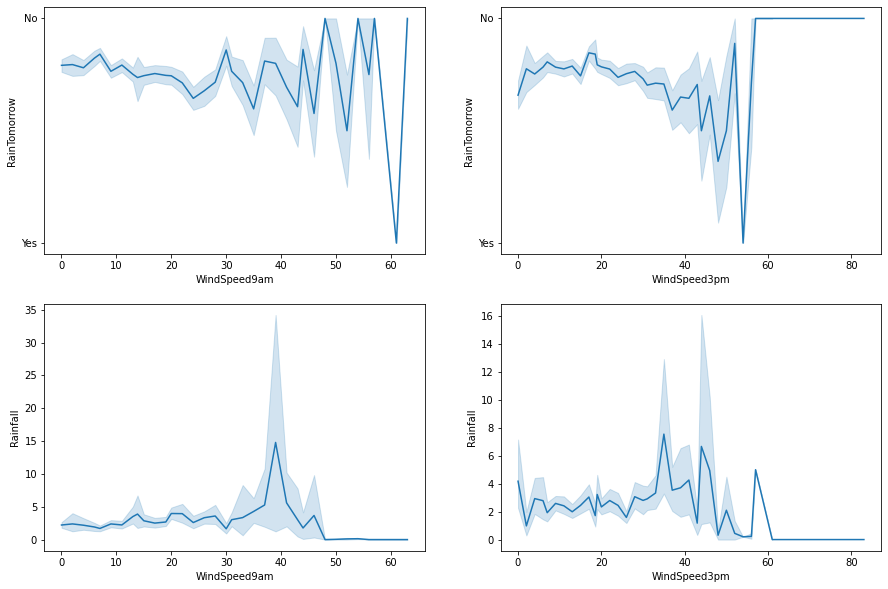

In [32]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindSpeed9am and RainTomorrow
sns.lineplot(x='WindSpeed9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between WindSpeed3pm and RainTomorrow
sns.lineplot(x='WindSpeed3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between WindSpeed9am and Rainfall
sns.lineplot(x='WindSpeed9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between WindSpeed3pm and Rainfall
sns.lineplot(x='WindSpeed3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

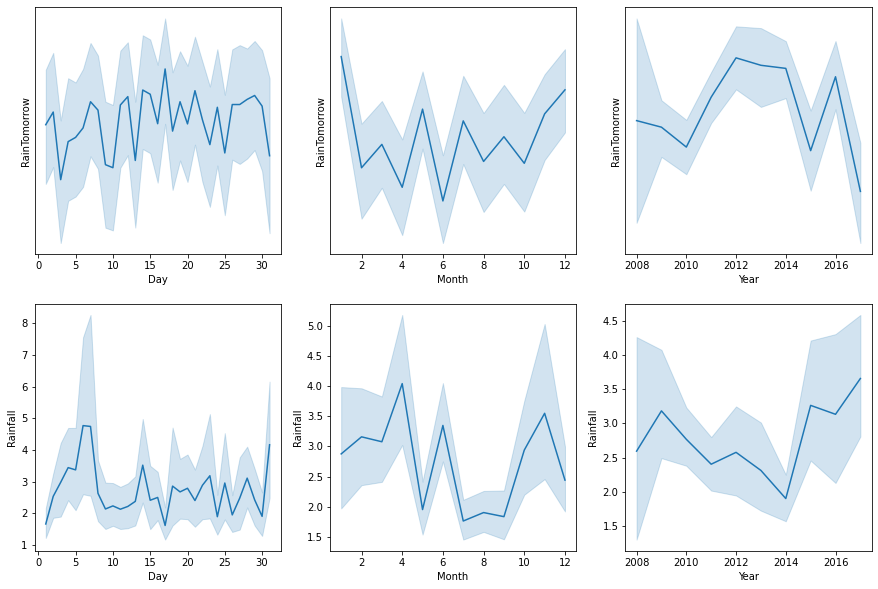

In [33]:
fig,axes=plt.subplots(2,3,figsize=(15,10))

#checking the relation between Day and RainTomorrow
sns.lineplot(x='Day',y='RainTomorrow',ax=axes[0,0],palette="green",data=df)

#checking the relation between Month and RainTomorrow
sns.lineplot(x='Month',y='RainTomorrow',ax=axes[0,1],palette="green",data=df)

#checking the relation between Year and RainTomorrow
sns.lineplot(x='Year',y='RainTomorrow',ax=axes[0,2],palette="green",data=df)

#checking the relation between Day and Rainfall
sns.lineplot(x='Day',y='Rainfall',ax=axes[1,0],palette="purple",data=df)

#checking the relation between Month and Rainfall
sns.lineplot(x='Month',y='Rainfall',ax=axes[1,1],palette="purple",data=df)

#checking the relation between Year and Rainfall
sns.lineplot(x='Year',y='Rainfall',ax=axes[1,2],palette="purple",data=df)

# outliers

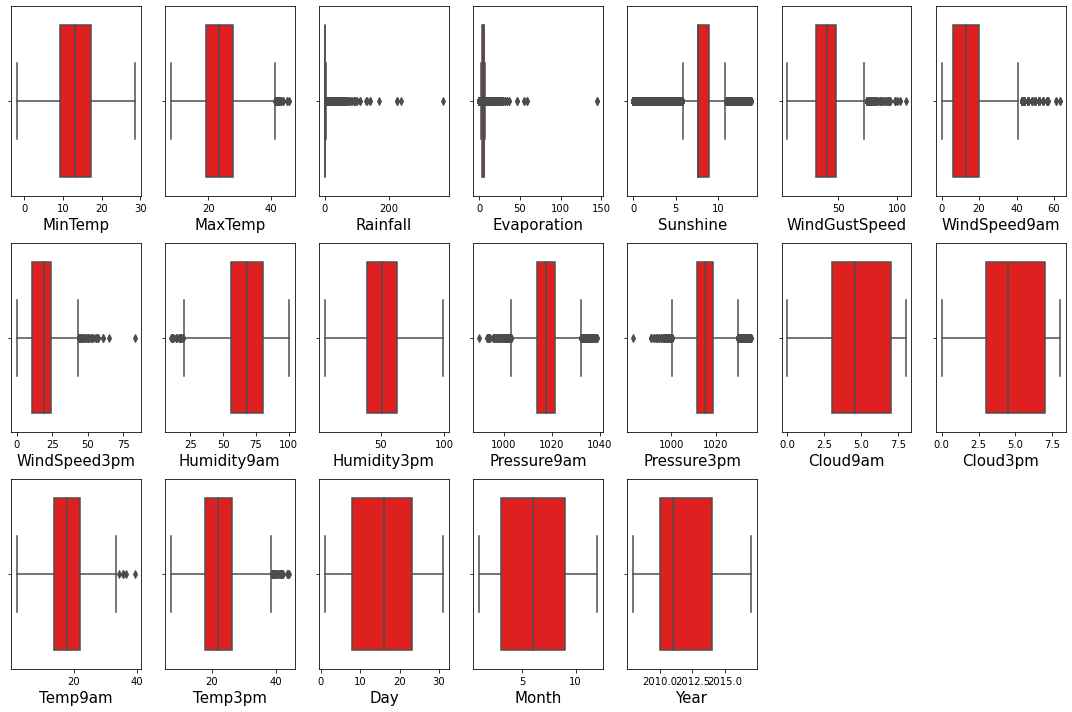

In [34]:
# Identifying the outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(3,7,plotnumber)
        sns.boxplot(df[column],color="red")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

# Zscore 

In [35]:
feature = df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
z=np.abs(zscore(feature))
z

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,1.570089e-01,0.206021,2.305893e-16,1.257472e-15,0.277710,0.607461,0.563297,0.189439,1.584003,1.308665,0.153712,0.108138
1,2.028121e-01,0.264165,2.305893e-16,1.257472e-15,0.277710,0.972321,0.357200,1.420268,1.121880,1.196072,0.100217,0.312348
2,3.009450e-01,0.264165,2.305893e-16,1.257472e-15,0.422897,0.508725,0.769394,1.777981,1.599939,1.051309,0.577390,0.127334
3,6.771214e-01,0.264165,2.305893e-16,1.257472e-15,1.174166,0.281166,0.982428,1.360650,0.006411,0.391836,0.060269,0.682376
4,1.380408e+00,0.167258,2.305893e-16,1.257472e-15,0.059928,0.676112,0.151104,0.845246,1.090010,1.485596,0.006773,1.220599
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,7.523137e-02,0.264165,2.305893e-16,1.257472e-15,0.666009,0.083694,0.776331,1.002937,1.109058,0.814518,1.366273,0.007221
8421,2.355231e-01,0.264165,2.305893e-16,1.257472e-15,1.319354,0.083694,0.982428,0.704843,0.933770,0.621501,1.223619,0.345987
8422,4.972110e-01,0.264165,2.305893e-16,1.257472e-15,0.230447,0.478639,0.982428,0.883699,0.535388,0.251553,0.938310,0.615099
8423,5.135665e-01,0.264165,2.305893e-16,1.257472e-15,0.883791,0.083694,1.188525,1.002937,0.280424,0.203299,0.474684,0.598279


In [36]:
df1 = df[(z<3).all(axis=1)] 
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,24,6,2017


# Skewness

In [37]:
df1.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.519090
Evaporation      0.846181
Sunshine        -0.723970
WindGustSpeed    0.506897
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
Day              0.002731
Month            0.054460
Year             0.430100
dtype: float64

# Log-Transform

In [38]:
df1["Sunshine"] = np.log1p(df1["Sunshine"])
df1["Rainfall"] = np.log1p(df1["Rainfall"])
df1["Evaporation"] = np.log1p(df1["Evaporation"])
df1["WindSpeed9am"] = np.log1p(df1["WindSpeed9am"])
df1["WindGustSpeed"] = np.log1p(df1["WindGustSpeed"])

In [39]:
df1.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         1.811941
Evaporation     -0.993594
Sunshine        -2.460672
WindGustSpeed   -0.526267
WindSpeed9am    -1.186810
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
Day              0.002731
Month            0.054460
Year             0.430100
dtype: float64

# Encoding-LabelEncoder

In [40]:
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
lab_enc=LabelEncoder()
df1[cat_col]= df1[cat_col].apply(lab_enc.fit_transform)
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.900000,0.470004,1.85464,2.1555,13,3.806662,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.100000,0.000000,1.85464,2.1555,14,3.806662,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.700000,0.000000,1.85464,2.1555,15,3.850148,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.000000,0.000000,1.85464,2.1555,4,3.218876,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.300000,0.693147,1.85464,2.1555,13,3.737670,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.000000,1.85464,2.1555,0,3.465736,9,1,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,0.000000,1.85464,2.1555,6,3.135494,9,3,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,0.000000,1.85464,2.1555,3,3.637586,9,14,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,0.000000,1.85464,2.1555,9,3.367296,10,3,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6,2017


In [43]:
df1.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
Day                int64
Month              int64
Year               int64
dtype: object

In [44]:
df1.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.116694,0.063798,0.013354,0.123801,0.068152,-0.037707,0.263202,-0.041030,-0.031195,...,-0.012288,0.041859,0.027050,0.118100,0.060707,0.002934,0.009222,-0.004978,-0.086011,0.481143
MinTemp,0.116694,1.000000,0.718598,0.080984,0.355551,0.008673,-0.154935,0.262663,-0.045231,-0.154184,...,-0.427936,0.089354,0.036649,0.888690,0.687570,0.061728,0.091021,0.010924,-0.247066,0.040001
MaxTemp,0.063798,0.718598,1.000000,-0.206494,0.458312,0.316812,-0.237955,0.163935,-0.217160,-0.190417,...,-0.414358,-0.252579,-0.248268,0.864864,0.974957,-0.219747,-0.149708,0.017068,-0.164351,0.120204
Rainfall,0.013354,0.080984,-0.206494,1.000000,-0.151081,-0.189936,0.116389,0.086445,0.148138,0.103933,...,-0.034828,0.278194,0.240747,-0.076736,-0.215864,0.902769,0.317142,-0.016476,-0.005666,0.002860
Evaporation,0.123801,0.355551,0.458312,-0.151081,1.000000,0.349285,-0.116103,0.154434,-0.096182,-0.039583,...,-0.269095,-0.101440,-0.137281,0.424506,0.446336,-0.166170,-0.087821,0.009767,-0.047647,0.148225
Sunshine,0.068152,0.008673,0.316812,-0.189936,0.349285,1.000000,-0.073069,0.002758,-0.054298,-0.049383,...,-0.035891,-0.438407,-0.460418,0.182254,0.332749,-0.187463,-0.293951,-0.000143,-0.001379,0.115062
WindGustDir,-0.037707,-0.154935,-0.237955,0.116389,-0.116103,-0.073069,1.000000,-0.002519,0.405681,0.507292,...,-0.008263,0.123415,0.093527,-0.185080,-0.249791,0.121709,0.044378,0.017003,0.038044,-0.096042
WindGustSpeed,0.263202,0.262663,0.163935,0.086445,0.154434,0.002758,-0.002519,1.000000,-0.059409,0.086693,...,-0.322502,0.001923,0.053528,0.237165,0.130016,0.075067,0.161878,-0.005867,0.048639,-0.014468
WindDir9am,-0.041030,-0.045231,-0.217160,0.148138,-0.096182,-0.054298,0.405681,-0.059409,1.000000,0.243622,...,0.081400,0.092396,0.062637,-0.101576,-0.224390,0.149239,0.027091,-0.010014,0.018344,-0.034468
WindDir3pm,-0.031195,-0.154184,-0.190417,0.103933,-0.039583,-0.049383,0.507292,0.086693,0.243622,1.000000,...,-0.037280,0.073742,0.054321,-0.172000,-0.202000,0.100983,0.003674,-0.000714,0.028629,-0.010781


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]),
 [Text(0, 0.5, 'Location'),
  Text(0, 1.5, 'MinTemp'),
  Text(0, 2.5, 'MaxTemp'),
  Text(0, 3.5, 'Rainfall'),
  Text(0, 4.5, 'Evaporation'),
  Text(0, 5.5, 'Sunshine'),
  Text(0, 6.5, 'WindGustDir'),
  Text(0, 7.5, 'WindGustSpeed'),
  Text(0, 8.5, 'WindDir9am'),
  Text(0, 9.5, 'WindDir3pm'),
  Text(0, 10.5, 'WindSpeed9am'),
  Text(0, 11.5, 'WindSpeed3pm'),
  Text(0, 12.5, 'Humidity9am'),
  Text(0, 13.5, 'Humidity3pm'),
  Text(0, 14.5, 'Pressure9am'),
  Text(0, 15.5, 'Pressure3pm'),
  Text(0, 16.5, 'Cloud9am'),
  Text(0, 17.5, 'Cloud3pm'),
  Text(0, 18.5, 'Temp9am'),
  Text(0, 19.5, 'Temp3pm'),
  Text(0, 20.5, 'RainToday'),
  Text(0, 21.5, 'RainTomorrow'),
  Text(0, 22.5, 'Day'),
  Text(0, 23.5, 'Month'),
  Text(0, 24.5, 'Year')])

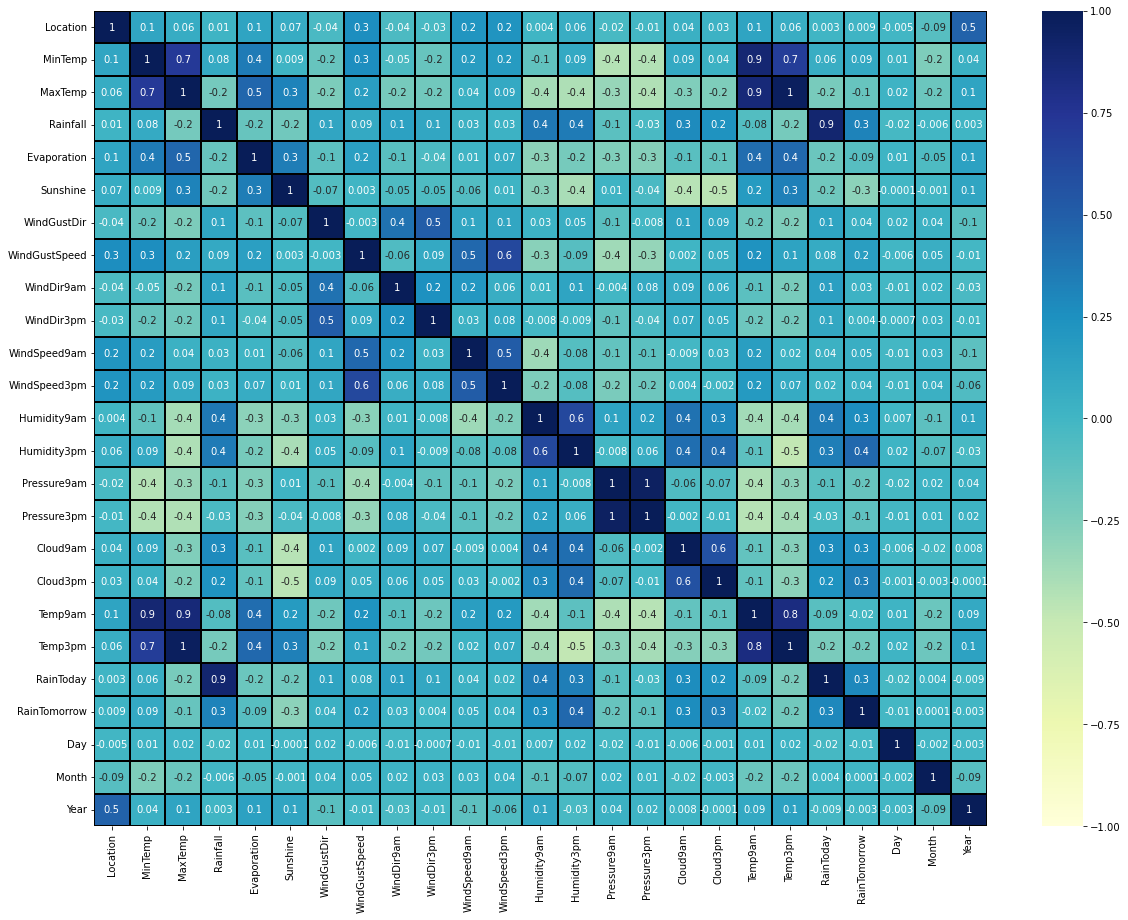

In [45]:
plt.figure(figsize=(20,15))    
sns.heatmap(df1.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0)

# Corelation between label and features...

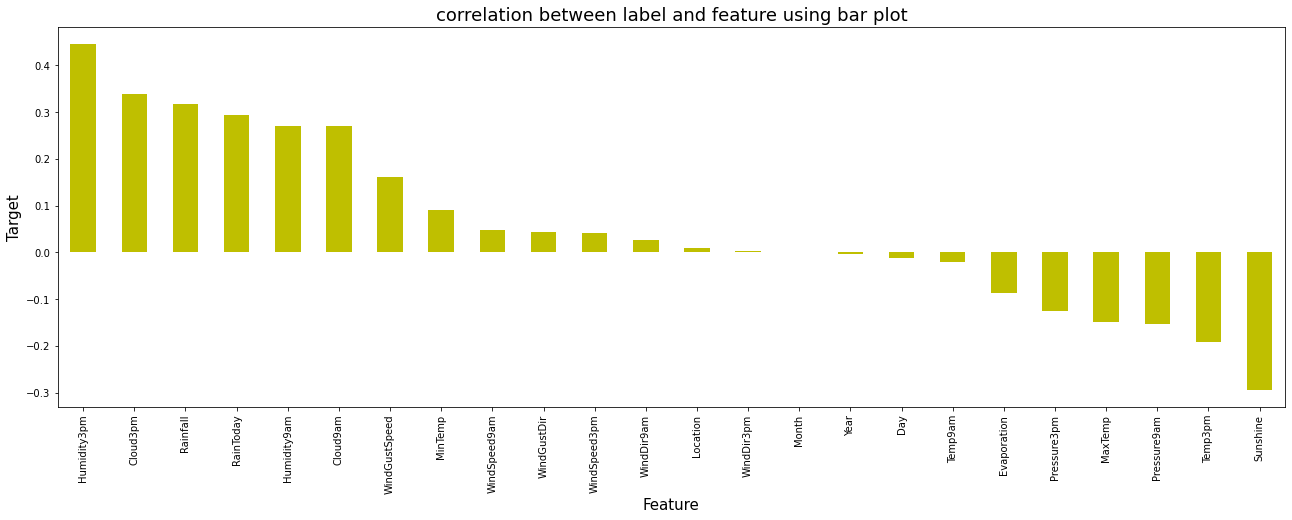

In [46]:
plt.figure(figsize=(22,7))
df1.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

# Datapreprocessing

# Splittting dataset into X and Y

In [47]:
X = df1.drop("RainTomorrow", axis=1)
Y = df1["RainTomorrow"]

# Scaling by using StandardScaler

In [48]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.508427,0.056444,-0.145732,-0.001029,0.2832,0.169416,1.229267,0.485042,1.250245,1.400214,...,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,-0.543392,0.2832,0.169416,1.441960,0.485042,-0.277857,1.626597,...,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,-0.543392,0.2832,0.169416,1.654654,0.615247,1.250245,1.626597,...,-1.703856,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,-0.543392,0.2832,0.169416,-0.684977,-1.274926,0.377044,-1.769138,...,-0.032451,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.256468,0.2832,0.169416,1.229267,0.278462,-1.369358,-0.184462,...,-1.169007,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,-0.543392,0.2832,0.169416,-1.535751,-0.535770,0.377044,-1.542755,...,1.137532,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,-0.543392,0.2832,0.169416,-0.259589,-1.524590,0.377044,-1.089991,...,0.953678,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,-0.543392,0.2832,0.169416,-0.897670,-0.021211,0.377044,1.400214,...,0.535827,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,-0.543392,0.2832,0.169416,0.378492,-0.830522,0.595344,-1.089991,...,0.268402,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,0.942990,-0.123726,2.004134


# VIF

In [49]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,1.591950,Location
1,8.763864,MinTemp
2,26.351310,MaxTemp
3,5.619158,Rainfall
4,1.505020,Evaporation
5,1.633523,Sunshine
6,1.621681,WindGustDir
7,2.158495,WindGustSpeed
8,1.397334,WindDir9am
9,1.493832,WindDir3pm


In [50]:
# Dropping Temp3pm column
X.drop("Temp3pm",axis=1,inplace=True)

In [51]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,1.590914,Location
1,8.725374,MinTemp
2,9.618350,MaxTemp
3,5.616245,Rainfall
4,1.503205,Evaporation
5,1.632528,Sunshine
6,1.618586,WindGustDir
7,2.151185,WindGustSpeed
8,1.396733,WindDir9am
9,1.492748,WindDir3pm


In [52]:
# Dropping Pressure9am column
X.drop("Pressure9am",axis=1,inplace=True)

In [53]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,1.590819,Location
1,8.576956,MinTemp
2,9.205668,MaxTemp
3,5.604577,Rainfall
4,1.491358,Evaporation
5,1.632164,Sunshine
6,1.603541,WindGustDir
7,2.132035,WindGustSpeed
8,1.373054,WindDir9am
9,1.426346,WindDir3pm


In [54]:
# Dropping Temp9am column
X.drop("Temp9am",axis=1,inplace=True)

In [55]:
X.shape

(7987, 21)

In [56]:
Y.shape

(7987,)

# Finding RandomState

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.30, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8489778890279516  on Random_state  14


# Creating train and test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=maxRS)

# ModelBuilding

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# LogisticRegression

In [61]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.8489778890279516
[[1780   94]
 [ 268  255]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1874
           1       0.73      0.49      0.58       523

    accuracy                           0.85      2397
   macro avg       0.80      0.72      0.75      2397
weighted avg       0.84      0.85      0.84      2397



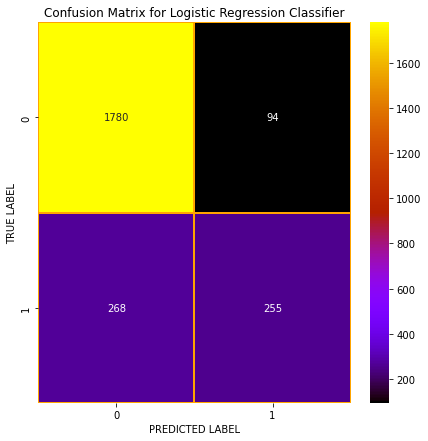

In [62]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="orange", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

In [63]:
print(cross_val_score(LR,X,Y,cv=5).mean())

0.825216006545439


# RANDOM FOREST CLASSIFIER

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

# Prediction
predRF = RF.predict(x_test)

print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test,predRF))

0.8977889027951607
[[1828   46]
 [ 199  324]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1874
           1       0.88      0.62      0.73       523

    accuracy                           0.90      2397
   macro avg       0.89      0.80      0.83      2397
weighted avg       0.90      0.90      0.89      2397



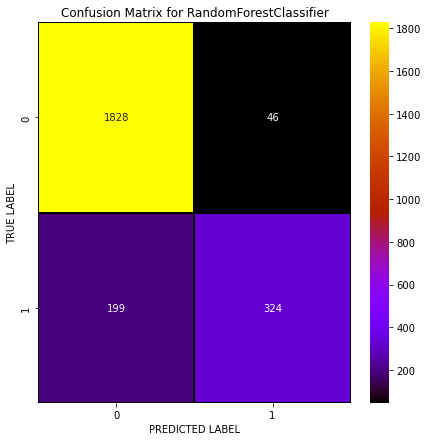

In [66]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRF)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [67]:
print(cross_val_score(RF,X,Y,cv=5).mean())

0.8500067006112056


# AdaBosstClassifier

In [68]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
# Checking accuracy for AdaBoost Classifier
ADA = AdaBoostClassifier()
ADA.fit(x_train,y_train)

# Prediction
predADA = ADA.predict(x_test)

print(accuracy_score(y_test, predADA))
print(confusion_matrix(y_test, predADA))
print(classification_report(y_test,predADA))

0.8477263245723822
[[1774  100]
 [ 265  258]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1874
           1       0.72      0.49      0.59       523

    accuracy                           0.85      2397
   macro avg       0.80      0.72      0.75      2397
weighted avg       0.84      0.85      0.84      2397



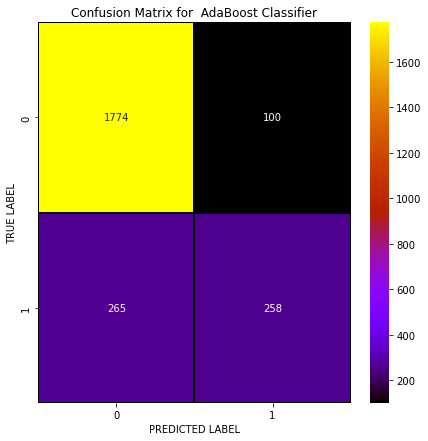

In [70]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predADA)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

In [71]:
print(cross_val_score(ADA,X,Y,cv=5).mean())

0.8050545335708458


# KNeighbors Classifier

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.8343763037129746
[[1770  104]
 [ 293  230]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1874
           1       0.69      0.44      0.54       523

    accuracy                           0.83      2397
   macro avg       0.77      0.69      0.72      2397
weighted avg       0.82      0.83      0.82      2397

Training accuracy:: 0.8667262969588551
Test accuracy:: 0.8343763037129746


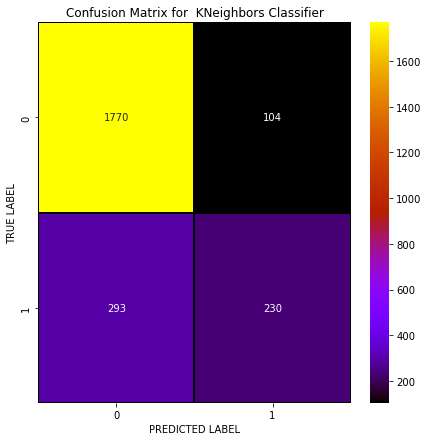

In [74]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,pred_knn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  KNeighbors Classifier')
plt.show()

In [75]:
print(cross_val_score(knn,X,Y,cv=5).mean())

0.8069364256980588


# DecisionTree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_test)
print(accuracy_score(y_test,pred_DT))
print(confusion_matrix(y_test,pred_DT))
print(classification_report(y_test,pred_DT))
print("Training accuracy::",DT.score(x_train,y_train))
print("Test accuracy::",DT.score(x_test,y_test))

0.8314559866499791
[[1656  218]
 [ 186  337]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1874
           1       0.61      0.64      0.63       523

    accuracy                           0.83      2397
   macro avg       0.75      0.76      0.76      2397
weighted avg       0.84      0.83      0.83      2397

Training accuracy:: 1.0
Test accuracy:: 0.8314559866499791


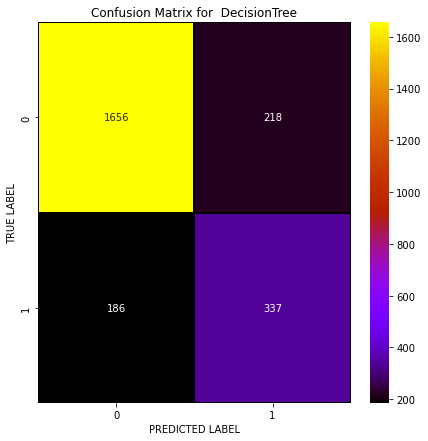

In [78]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,pred_DT)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  DecisionTree')
plt.show()

In [79]:
print(cross_val_score(DT,X,Y,cv=5).mean())

0.7896589584820726


# HyperParameter Tuning-GridSearchCV

In [80]:
#RandomForest
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [5, 10, 15],
              'max_depth' : [0, 10, 15],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [5,10, 20, 30]}

In [81]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [82]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 15],
                         'n_estimators': [5, 10, 20, 30], 'n_jobs': [-2, -1, 1],
                         'random_state': [5, 10, 15]})

In [83]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'n_estimators': 30,
 'n_jobs': -2,
 'random_state': 5}

In [84]:
Rainfall_Tomorrow=RandomForestClassifier(criterion='gini', max_depth=20, n_estimators=200, n_jobs=-2, random_state=1000)
Rainfall_Tomorrow.fit(x_train, y_train)
pred = Rainfall_Tomorrow.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.69545264914477


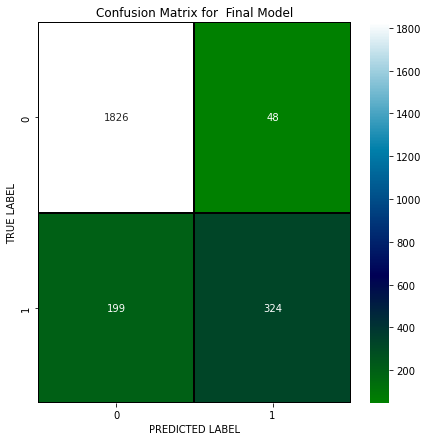

In [85]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show() 

# ROC and AUC score

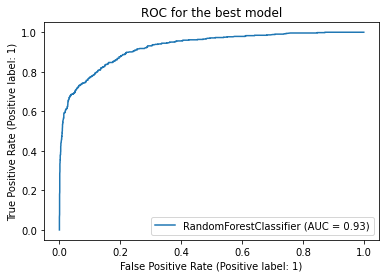

In [86]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Rainfall_Tomorrow, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

#                                       Prediction For Rainfall

# Splitting label and Feature

In [87]:
df1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.470004,1.85464,2.1555,13,3.806662,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.000000,1.85464,2.1555,14,3.806662,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.000000,1.85464,2.1555,15,3.850148,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.000000,1.85464,2.1555,4,3.218876,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,0.693147,1.85464,2.1555,13,3.737670,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


In [88]:
x = df1.drop("Rainfall", axis=1)
y = df1["Rainfall"]

# StandardScaler Again

In [89]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.508427,0.056444,-0.145732,0.2832,0.169416,1.229267,0.485042,1.250245,1.400214,0.742680,...,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-0.543635,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,0.2832,0.169416,1.441960,0.485042,-0.277857,1.626597,-0.771299,...,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-0.543635,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,0.2832,0.169416,1.654654,0.615247,1.250245,1.626597,0.691207,...,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-0.543635,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,0.2832,0.169416,-0.684977,-1.274926,0.377044,-1.769138,0.152299,...,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-0.543635,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.2832,0.169416,1.229267,0.278462,-1.369358,-0.184462,-0.275457,...,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-0.543635,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,0.2832,0.169416,-1.535751,-0.535770,0.377044,-1.542755,0.314924,...,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,-0.543635,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,0.2832,0.169416,-0.259589,-1.524590,0.377044,-1.089991,0.314924,...,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,-0.543635,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,0.2832,0.169416,-0.897670,-0.021211,0.377044,1.400214,-0.040046,...,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,-0.543635,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,0.2832,0.169416,0.378492,-0.830522,0.595344,-1.089991,0.314924,...,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,-0.543635,0.942990,-0.123726,2.004134


# VIF 

In [90]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.602216,Location
1,8.776052,MinTemp
2,26.340651,MaxTemp
3,1.505386,Evaporation
4,1.647674,Sunshine
5,1.623987,WindGustDir
6,2.216485,WindGustSpeed
7,1.396968,WindDir9am
8,1.495284,WindDir3pm
9,1.814908,WindSpeed9am


In [91]:
# Dropping MaxTemp column
x.drop("MaxTemp",axis=1,inplace=True)

In [92]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.600105,Location
1,8.762938,MinTemp
2,1.502767,Evaporation
3,1.641266,Sunshine
4,1.623369,WindGustDir
5,2.206998,WindGustSpeed
6,1.394553,WindDir9am
7,1.494076,WindDir3pm
8,1.814058,WindSpeed9am
9,1.964154,WindSpeed3pm


In [93]:
# Dropping Pressure9am column
x.drop("Pressure9am",axis=1,inplace=True)

In [94]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.600020,Location
1,8.597799,MinTemp
2,1.489207,Evaporation
3,1.640480,Sunshine
4,1.610549,WindGustDir
5,2.187804,WindGustSpeed
6,1.372896,WindDir9am
7,1.432629,WindDir3pm
8,1.804904,WindSpeed9am
9,1.951201,WindSpeed3pm


In [95]:
# Dropping Temp9am column
x.drop("Temp9am",axis=1,inplace=True)

In [96]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.599476,Location
1,4.956734,MinTemp
2,1.484270,Evaporation
3,1.633260,Sunshine
4,1.605885,WindGustDir
5,2.166456,WindGustSpeed
6,1.372360,WindDir9am
7,1.432534,WindDir3pm
8,1.794714,WindSpeed9am
9,1.910324,WindSpeed3pm


# RandomState Again

In [97]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [98]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8887735428555712  on Random_state  195


# Train and test 

# RandomForestRegressor

In [101]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

# prediction
predRF=RF.predict(x_test)
print('R2_Score:',r2_score(y_test,predRF))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predRF))
print('MSE:',metrics.mean_squared_error(y_test, predRF))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRF)))

R2_Score: 0.8769998412027991
MAE: 0.15648309830223073
MSE: 0.09622800928560778
RMSE: 0.31020639787987575


In [102]:
print('Random Forest:',cross_val_score(RF,x,y,cv=5).mean())

Random Forest: 0.8518581496570274


# DecisionTree Regressor

In [103]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

# prediction
predDT=DT.predict(x_test)
print('R2_Score:',r2_score(y_test,predDT))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predDT))
print('MSE:',metrics.mean_squared_error(y_test, predDT))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDT)))

R2_Score: 0.7783291396152107
MAE: 0.17206842480692136
MSE: 0.17342209815050724
RMSE: 0.41643978934595965


In [104]:
print('Random Forest:',cross_val_score(DT,x,y,cv=5).mean())

Random Forest: 0.719144226970009


# GradientBoostRegressor

In [105]:
GRA=GradientBoostingRegressor()
GRA.fit(x_train,y_train)

# prediction
predGRA=GRA.predict(x_test)
print('R2_Score:',r2_score(y_test,predGRA))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predGRA))
print('MSE:',metrics.mean_squared_error(y_test, predGRA))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGRA)))

R2_Score: 0.8511276001803483
MAE: 0.18325679973850756
MSE: 0.11646891201039782
RMSE: 0.34127541958130797


In [106]:
print('Random Forest:',cross_val_score(GRA,x,y,cv=5).mean())

Random Forest: 0.8288356027234902


# BaggingRegressor

In [107]:
from sklearn.ensemble import BaggingRegressor

In [108]:
BAG=BaggingRegressor()
BAG.fit(x_train,y_train)

# prediction
predBAG=BAG.predict(x_test)
print('R2_Score:',r2_score(y_test,predBAG))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predBAG))
print('MSE:',metrics.mean_squared_error(y_test, predBAG))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predBAG)))

R2_Score: 0.867331703316468
MAE: 0.1591105163661137
MSE: 0.10379178539287541
RMSE: 0.32216732514778


In [109]:
print('Random Forest:',cross_val_score(BAG,x,y,cv=5).mean())

Random Forest: 0.8387140542929746


In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
LIN=LinearRegression()
LIN.fit(x_train,y_train)

# prediction
predLIN=LIN.predict(x_test)
print('R2_Score:',r2_score(y_test,predLIN))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predLIN))
print('MSE:',metrics.mean_squared_error(y_test, predLIN))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLIN)))

R2_Score: 0.8357876910529136
MAE: 0.20424894368841953
MSE: 0.12846994463011144
RMSE: 0.35842704226956906


In [112]:
print('Random Forest:',cross_val_score(LIN,x,y,cv=5).mean())

Random Forest: 0.8194197773714226


# HyperParameterTuning

In [113]:
parameters = {'n_estimators' : [5,10,20],
              'criterion' :['mse', 'mae'],
              'max_depth' : [4, 6, 8]}

In [114]:
GCV=GridSearchCV(RF,parameters,cv=5)

In [115]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [4, 6, 8],
                         'n_estimators': [5, 10, 20]})

In [116]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 8, 'n_estimators': 20}

In [117]:
Rainfall = RandomForestRegressor(criterion='mse', max_depth=8, n_estimators=100)
Rainfall.fit(x_train, y_train)
pred = Rainfall.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))

R2_Score: 86.12543803503512
RMSE value: 0.32946368761421335
MAE: 0.1754290782731223
MSE: 0.10854632145635595


# saving model

In [119]:
import joblib
joblib.dump(Rainfall,"RainFall_Tomorrow_&_Rainfall-Prediction.pkl")

['RainFall_Tomorrow_&_Rainfall-Prediction.pkl']